In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import string
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer, WordNetLemmatizer


import warnings 
warnings.filterwarnings("ignore")

In [2]:
df_train= pd.read_csv('Malignant Comments Classifier.csv')
df_train.head()

,id,comment_text,malignant,highly_malignant,rude,threat,abuse,loathe
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0


In [3]:
df_train.shape

(159571, 8)

In [4]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159571 entries, 0 to 159570
Data columns (total 8 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   id                159571 non-null  object
 1   comment_text      159571 non-null  object
 2   malignant         159571 non-null  int64 
 3   highly_malignant  159571 non-null  int64 
 4   rude              159571 non-null  int64 
 5   threat            159571 non-null  int64 
 6   abuse             159571 non-null  int64 
 7   loathe            159571 non-null  int64 
dtypes: int64(6), object(2)
memory usage: 9.7+ MB


In [5]:
df_train.describe()

,malignant,highly_malignant,rude,threat,abuse,loathe
count,159571.000000,159571.000000,159571.000000,159571.000000,159571.000000,159571.000000
mean,0.095844,0.009996,0.052948,0.002996,0.049364,0.008805
std,0.294379,0.099477,0.223931,0.054650,0.216627,0.093420
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [6]:
df_train.drop('id',axis=1, inplace=True)

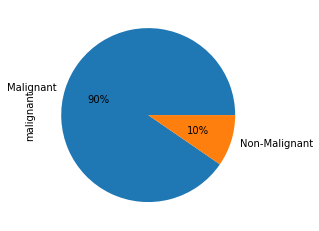

In [7]:
df_train['malignant'].value_counts().plot.pie(labels= ['Malignant', 'Non-Malignant'], autopct= '%1.0f%%')
plt.show()

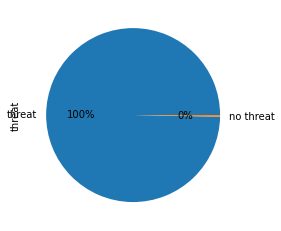

In [8]:
df_train['threat'].value_counts().plot.pie(labels=['threat','no threat'], autopct= '%1.0f%%')
plt.show()

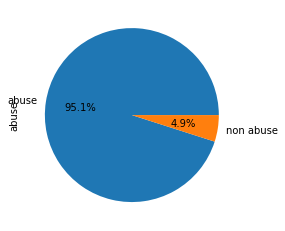

In [9]:
df_train['abuse'].value_counts().plot.pie(labels= ['abuse', 'non abuse'], autopct= '%0.1f%%')
plt.show()

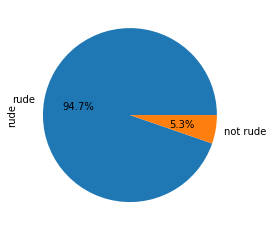

In [10]:
df_train['rude'].value_counts().plot.pie(labels= ['rude', 'not rude'], autopct= '%0.1f%%')
plt.show()

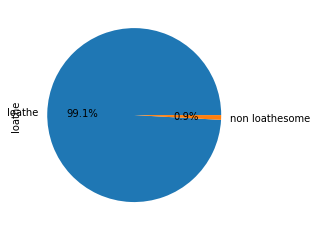

In [11]:
df_train['loathe'].value_counts().plot.pie(labels= ['loathe','non loathesome'], autopct= '%0.1f%%')
plt.show()

<AxesSubplot:title={'center':'comments distribution based on labels'}, ylabel='count'>

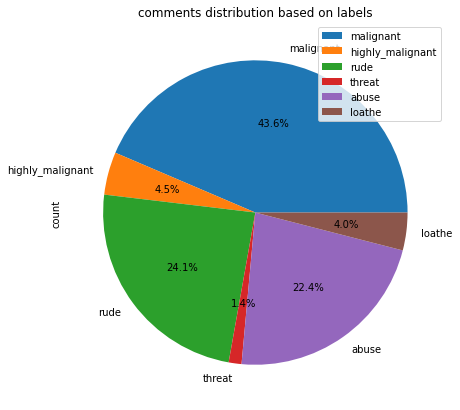

In [12]:
#checking how much which comment falls under which category
cols= ['malignant', 'highly_malignant', 'rude', 'threat', 'abuse', 'loathe']
df_plot= df_train[cols].sum().to_frame().rename(columns= {0 : 'count'})
df_plot.plot.pie(y= 'count', title='comments distribution based on labels', figsize=(8,7), autopct= '%0.1f%%')

Here we can see that malignant comments are the highest compared to others

<AxesSubplot:>

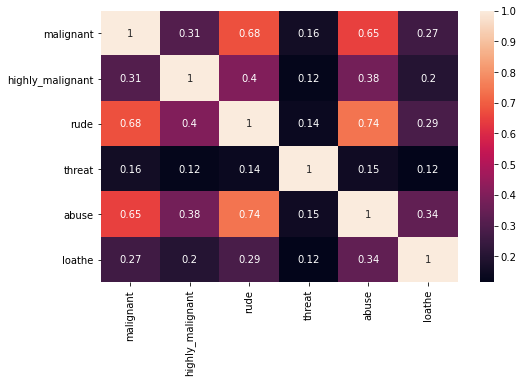

In [13]:
plt.figure(figsize=(8,5))
sns.heatmap(df_train.corr(),annot=True)

In [14]:
#checking length of document
df_train["original_len"] = df_train["comment_text"].str.len() 

In [15]:
#converting all letters to lower case
df_train['comment_text']= df_train['comment_text'].str.lower()

In [16]:
#replacing with web address
df_train['comment_text']= df_train['comment_text'].str.replace(r'^http\://[a-zA-Z0-9\-\.]+\.[a-zA-Z]{2,3}(/\s*)?$','webaddress')

In [17]:
#replacing with number
df_train['comment_text']= df_train['comment_text'].str.replace(r'\d+(\.\d+)?','number')

In [18]:
#replacing with email address
df_train['comment_text']= df_train['comment_text'].str.replace(r'^.+@[^\.].*\.[a-z]{2,}$',"emailaddress")

In [19]:
#removing n
df_train['comment_text']=df_train['comment_text'].str.replace('\n','')

In [20]:
#removing punctuations
df_train['comment_text']= df_train['comment_text'].str.replace(r'[^\w\d\s]','')

In [21]:
#removing extra spaces
df_train['comment_text']= df_train['comment_text'].str.replace(r'^\s+','')

In [22]:
#replacing leadning and trailing white space
df_train["comment_text"]=df_train["comment_text"].str.replace(r'^\s+|\s+?$', "")

In [23]:
# remove stopwords
stop_words = set(stopwords.words('english') + ["m","ur","aww","d","dont","cant","doin","ja","u"])
df_train["comment_text"]= df_train["comment_text"].apply(lambda x: ' '.join(
    term for term in x.split() if term not in stop_words ))

In [24]:
lem=WordNetLemmatizer()
df_train['comment_text'] = df_train['comment_text'].apply(lambda x: ' '.join(
 lem.lemmatize(word) for word in x.split()))

In [25]:
#checking clean data
df_train['clean_len']= df_train['comment_text'].str.len()

In [26]:
df_train.head()

,comment_text,malignant,highly_malignant,rude,threat,abuse,loathe,original_len,clean_len
0,explanationwhy edits made username hardcore me...,0,0,0,0,0,0,264,185
1,daww match background colour im seemingly stuc...,0,0,0,0,0,0,112,98
2,hey man im really trying edit war guy constant...,0,0,0,0,0,0,233,144
3,morei make real suggestion improvement wondere...,0,0,0,0,0,0,622,376
4,sir hero chance remember page thats,0,0,0,0,0,0,67,35


In [27]:
#making one target column
df_train['label']= df_train['malignant'] | df_train['highly_malignant'] | df_train['rude'] | df_train['threat'] | df_train['abuse'] | df_train['loathe']

In [28]:
print('Original lenth is ', df_train.original_len.sum())
print('Cleaned length is ', df_train.clean_len.sum())

Original lenth is  62798218
Cleaned length is  40588496


# Test data

In [29]:
df_test = pd.read_csv('Malignant Comments Classifier_test.csv')
df_test.head()

,id,comment_text
0,00001cee341fdb12,Yo bitch Ja Rule is more succesful then you'll...
1,0000247867823ef7,== From RfC == \n\n The title is fine as it is...
2,00013b17ad220c46,""" \n\n == Sources == \n\n * Zawe Ashton on Lap..."
3,00017563c3f7919a,":If you have a look back at the source, the in..."
4,00017695ad8997eb,I don't anonymously edit articles at all.


In [30]:
df_test.shape

(153164, 2)

In [31]:
df_test.drop('id', axis=1, inplace=True)

In [32]:
df_test["comment_text"] = df_test["comment_text"].str.lower()

In [33]:
df_test["original_len"] = df_test["comment_text"].str.len() 

In [34]:
df_test.head()

,comment_text,original_len
0,yo bitch ja rule is more succesful then you'll...,367
1,== from rfc == \n\n the title is fine as it is...,50
2,""" \n\n == sources == \n\n * zawe ashton on lap...",54
3,":if you have a look back at the source, the in...",205
4,i don't anonymously edit articles at all.,41


In [35]:
#replacing with email address
df_test["comment_text"]= df_test["comment_text"].str.replace(r'^.+@[^\.].*\.[a-z]{2,}$',"emailaddress")

#replacing with web address                                                   
df_test["comment_text"]= df_test["comment_text"].str.replace(r'^http\://[a-zA-Z0-9\-\.]+\.[a-zA-Z]{2,3}(/\s*)?$',"webaddress")
                    
#replacing with number
df_test["comment_text"]= df_test["comment_text"].str.replace(r'\d+(\.\d+)?',"number")

#remove  punctation
df_test["comment_text"]=df_test["comment_text"].str.replace(r'[^\w\d\s]'," ")

# replace extra space
df_test["comment_text"]=df_test["comment_text"].str.replace(r'^\s+'," ")

#replacing leading and trailing white space
df_test["comment_text"]=df_test["comment_text"].str.replace(r'^\s+|\s+?$', "")

#replacing with\n
df_test["comment_text"]=df_test["comment_text"].str.replace("\n"," ")

In [36]:
# remove stopwords
stop_words = set(stopwords.words('english') + ["m","ur","aww","d","dont","cant","doin","ja","u"])
df_test["comment_text"]= df_test["comment_text"].apply(lambda x: ' '.join(
    term for term in x.split() if term not in stop_words ))

In [37]:
lem=WordNetLemmatizer()
df_test['comment_text'] = df_test['comment_text'].apply(lambda x: ' '.join(
 lem.lemmatize(word) for word in x.split()))

In [38]:
df_test["clean_len"] = df_test["comment_text"].str.len() 

In [39]:
df_test.head()

,comment_text,original_len,clean_len
0,yo bitch rule succesful ever whats hating sad ...,367,221
1,rfc title fine imo,50,18
2,source zawe ashton lapland,54,26
3,look back source information updated correct f...,205,109
4,anonymously edit article,41,24


In [40]:
print('original length',df_test.original_len.sum())
print('cleaned length',df_test.clean_len.sum())

original length 51972014
cleaned length 32976763


In [41]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.metrics import accuracy_score,classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier,AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
from sklearn.metrics import log_loss
from sklearn.metrics import roc_auc_score
from sklearn.feature_extraction.text import TfidfVectorizer

In [42]:
#using tfidf vectorizer to convert text into vector as our machine learning model only understands numerical value
tf= TfidfVectorizer()
features = tf.fit_transform(df_train["comment_text"])
x= features
y= df_train["label"]

In [43]:
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=80)

# Logistic Regression

In [44]:
lr= LogisticRegression()
lr.fit(x_train,y_train)
predlr= lr.predict(x_test)
print('Accuracy Score: ',accuracy_score(y_test,predlr))
print('Confusion Matrix: \n',confusion_matrix(y_test,predlr))
print('Classification Report: \n ',classification_report(y_test,predlr))
print('Log Loss: ',log_loss(y_test,predlr))

Accuracy Score:  0.951394981575715
Confusion Matrix: 
 [[35600   170]
 [ 1769  2354]]
Classification Report: 
                precision    recall  f1-score   support

           0       0.95      1.00      0.97     35770
           1       0.93      0.57      0.71      4123

    accuracy                           0.95     39893
   macro avg       0.94      0.78      0.84     39893
weighted avg       0.95      0.95      0.95     39893

Log Loss:  1.6787612704307768


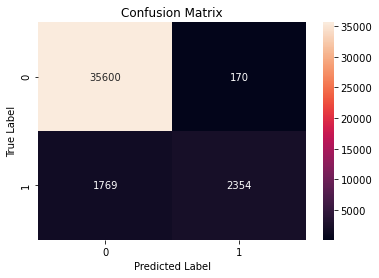

In [45]:
matrix= confusion_matrix(y_test, predlr)
df = pd.DataFrame(matrix)
sns.heatmap(df, annot=True, fmt='d')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# MultinomialNB

In [46]:
mnb= MultinomialNB()
mnb.fit(x_train,y_train)
predmnb= mnb.predict(x_test)
print('Accuracy Score: ',accuracy_score(y_test,predmnb))
print('Confusion Matrix: \n',confusion_matrix(y_test,predmnb))
print('Classification Report: \n ',classification_report(y_test,predmnb))
print('Log Loss: ',log_loss(y_test,predmnb))

Accuracy Score:  0.9120647732684932
Confusion Matrix: 
 [[35760    10]
 [ 3498   625]]
Classification Report: 
                precision    recall  f1-score   support

           0       0.91      1.00      0.95     35770
           1       0.98      0.15      0.26      4123

    accuracy                           0.91     39893
   macro avg       0.95      0.58      0.61     39893
weighted avg       0.92      0.91      0.88     39893

Log Loss:  3.0371753337508083


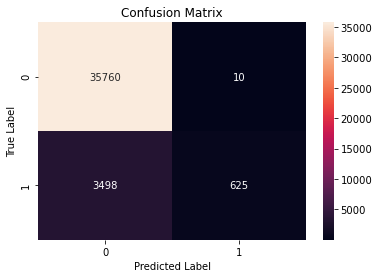

In [47]:
matrix= confusion_matrix(y_test, predmnb)
df = pd.DataFrame(matrix)
sns.heatmap(df, annot=True, fmt='d')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# AdaBoost Classifier

In [48]:
abc= AdaBoostClassifier()
abc.fit(x_train,y_train)
predabc= abc.predict(x_test)
print('Accuracy Score: ',accuracy_score(y_test,predabc))
print('Confusion Matrix: \n',confusioen_matrix(y_test,predabc))
print('Classification Report: \n ',classification_report(y_test,predabc))
print('Log Loss: ',log_loss(y_test,predabc))

Accuracy Score:  0.9440503346451758
Confusion Matrix: 
 [[35499   271]
 [ 1961  2162]]
Classification Report: 
                precision    recall  f1-score   support

           0       0.95      0.99      0.97     35770
           1       0.89      0.52      0.66      4123

    accuracy                           0.94     39893
   macro avg       0.92      0.76      0.81     39893
weighted avg       0.94      0.94      0.94     39893

Log Loss:  1.932438412863015


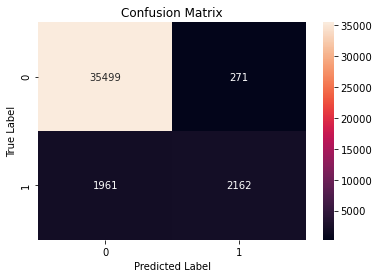

In [51]:
matrix= confusion_matrix(y_test, predabc)
df = pd.DataFrame(matrix)
sns.heatmap(df, annot=True, fmt='d')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# Random Forest Classifier

In [49]:
from sklearn.ensemble import RandomForestClassifier
rf= RandomForestClassifier()
rf.fit(x_train, y_train)
predrf= rf.predict(x_test)
print('Accuracy Score: ',accuracy_score(y_test,predrf))
print('Confusion Matrix: \n',confusion_matrix(y_test,predrf))
print('Classification Report: \n ',classification_report(y_test,predrf))
print('Log Loss: ',log_loss(y_test,predrf))

Accuracy Score:  0.9481863986162986
Confusion Matrix: 
 [[35610   160]
 [ 1907  2216]]
Classification Report: 
                precision    recall  f1-score   support

           0       0.95      1.00      0.97     35770
           1       0.93      0.54      0.68      4123

    accuracy                           0.95     39893
   macro avg       0.94      0.77      0.83     39893
weighted avg       0.95      0.95      0.94     39893

Log Loss:  1.7895815993750595


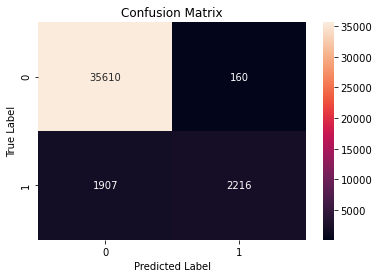

In [50]:
matrix= confusion_matrix(y_test, predrf)
df = pd.DataFrame(matrix)
sns.heatmap(df, annot=True, fmt='d')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

From above, we can see that logistic regression has the best accuracy and f1 score, so we will go ahead with logistic regression

# Hyperparameter tunning

In [52]:
from sklearn.model_selection import RandomizedSearchCV
param =      {'warm_start':[True,False],
            'dual':[True,False],
              'random_state':[50,70,100]}

In [54]:
random_search = RandomizedSearchCV(lr,param_distributions=param,cv=2)
random_search.fit(x_train,y_train)
random_search.best_params_
lr= LogisticRegression(warm_start=False,random_state=50,dual=False)
lr.fit(x_train,y_train)
predlrr= lr.predict(x_test)
print('Accuracy Score: ',accuracy_score(y_test,predlrr))
print('Confusion Matrix: \n',confusion_matrix(y_test,predlrr))
print('Classification Report: \n ',classification_report(y_test,predlrr))

Accuracy Score:  0.951394981575715
Confusion Matrix: 
 [[35600   170]
 [ 1769  2354]]
Classification Report: 
                precision    recall  f1-score   support

           0       0.95      1.00      0.97     35770
           1       0.93      0.57      0.71      4123

    accuracy                           0.95     39893
   macro avg       0.94      0.78      0.84     39893
weighted avg       0.95      0.95      0.95     39893



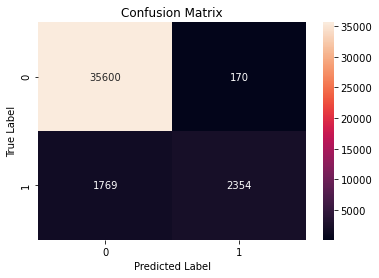

In [55]:
matrix= confusion_matrix(y_test, predlrr)
df = pd.DataFrame(matrix)
sns.heatmap(df, annot=True, fmt='d')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# AUC ROC Curve

In [56]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

In [58]:
y=lr.predict_proba(x_test)[:,1]
y

array([0.04088324, 0.01460928, 0.04855994, ..., 0.11275057, 0.04655775,
       0.1280449 ])

In [59]:
fpr,tpr,thresholds=roc_curve(y_test,y)

In [60]:
fpr

array([0.        , 0.        , 0.        , ..., 0.99924518, 0.99930109,
       1.        ])

In [61]:
tpr

array([0.00000000e+00, 2.42541838e-04, 4.60829493e-03, ...,
       1.00000000e+00, 1.00000000e+00, 1.00000000e+00])

In [62]:
thresholds

array([2.00000000e+00, 1.00000000e+00, 9.99999906e-01, ...,
       2.63371298e-04, 2.57511245e-04, 6.02931047e-05])

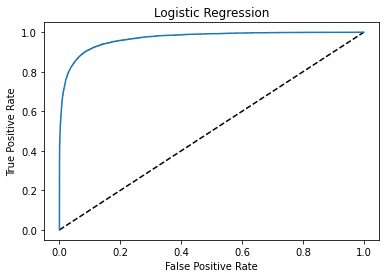

In [64]:
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label='Logistic Regression')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Logistic Regression')
plt.show()

In [65]:
score= roc_auc_score(y_test, lr.predict(x_test))
print(score)

0.7830954508928719


# saving model in pickle format

In [68]:
import pickle
filename='Malignant Comments Classifier .pkl'
pickle.dump(lr,open(filename,"wb"))

# Conclusion

In [69]:
model=pickle.load(open('Malignant Comments Classifier .pkl',"rb"))
result=model.score(x_test,y_test)
print(result)

0.951394981575715


In [70]:
conclusion=pd.DataFrame([model.predict(x_test)[:]],index=["Predicted","Original"])
conclusion

,0,1,2,3,4,5,6,7,8,9,...,39883,39884,39885,39886,39887,39888,39889,39890,39891,39892
Predicted,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Original,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# verifying model on testing data

In [71]:
testing_data = tf.transform(df_test["comment_text"])
a=lr.predict(testing_data)
pd.DataFrame(a)

,0
0,1
1,0
2,0
3,0
4,0
...,...
153159,1
153160,0
153161,0
153162,0


In [72]:
df_test["label"]=a

In [73]:
df_test

,comment_text,original_len,clean_len,label
0,yo bitch rule succesful ever whats hating sad ...,367,221,1
1,rfc title fine imo,50,18,0
2,source zawe ashton lapland,54,26,0
3,look back source information updated correct f...,205,109,0
4,anonymously edit article,41,24,0
...,...,...,...,...
153159,totally agree stuff nothing long crap,60,37,1
153160,throw field home plate get faster throwing cut...,198,107,0
153161,okinotorishima category see change agree corre...,423,238,0
153162,one founding nation eu germany law return quit...,502,319,0


# saving testing data

In [74]:
df_test.to_csv("test.csv")